In [20]:
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn


# Выборочные характеристики

In [21]:
n = 100                                                 
df = 5 
x= st.chi2.rvs(size = n, df=df)

In [22]:
# Рассчитаем основные выборочные характеристики
print('X_mean = ', np.mean(x)    )                   # выборочное среднее
print('S^2(X) = ',np.var(x)       )                  # выборочная дисперсия
print('sigma^2_cap = ', np.var(x, ddof = 1))         # скорректированная выборочная дисперсия
print('Median(x) = ' ,np.median(x)        )          # выборочная медиана
print('quantile with alpha = 0.3', np.quantile(x, 0.3)  )       # выборочная квантиль уровня 0.3
print('X^3_mean = ',np.mean(x ** 3)       )          # выборочный начальный момент 3-го порядка
np.sort(x)                                           # реализация вариационного ряда

X_mean =  5.118746439980381
S^2(X) =  11.929757042533684
sigma^2_cap =  12.050259638922913
Median(x) =  4.457444686952633
quantile with alpha = 0.3 3.345993708022406
X^3_mean =  386.1714505622581


array([ 0.2137214 ,  0.48671895,  0.60000217,  0.82021168,  1.19583131,
        1.23900826,  1.27670052,  1.44505562,  1.60584238,  1.70839612,
        1.71882292,  1.72683418,  1.78339018,  1.93733197,  2.14698941,
        2.15018889,  2.5399244 ,  2.55765533,  2.61551266,  2.6404235 ,
        2.68067018,  2.75054361,  2.79362952,  2.84442677,  2.84541588,
        2.87926412,  2.98994566,  3.1191547 ,  3.26268372,  3.27914106,
        3.37464484,  3.41345669,  3.47565109,  3.61134292,  3.62361199,
        3.65828399,  3.74312961,  3.79110863,  3.85016017,  3.87092741,
        3.87172047,  3.99726902,  4.00168196,  4.03352402,  4.0501659 ,
        4.20243705,  4.20387461,  4.28265502,  4.36527885,  4.44629613,
        4.46859324,  4.50700794,  4.60349973,  4.73115288,  4.81289845,
        4.86858382,  4.92345196,  4.95265287,  4.9633516 ,  4.96606835,
        5.04175593,  5.04959784,  5.09980612,  5.10240408,  5.10698443,
        5.11051293,  5.17757199,  5.28551536,  5.30795692,  5.49

In [23]:
# Визуализируем распределение
# выборочного среднего при помощи гистограммы
# Возьмем выборку из средних

In [24]:
N= 1000
means= [np.mean(st.chi2.rvs(df=df,size=n)) for i in range(N)]


Согласно ЦПТ среднее распределено нормально

(array([0.00909226, 0.04546131, 0.09092263, 0.22730657, 0.34550599,
        0.70919651, 1.0547025 , 1.17290192, 1.31837813, 1.19108645,
        0.87285724, 0.67282746, 0.60008935, 0.43642862, 0.19093752,
        0.10001489, 0.03636905, 0.01818453]),
 array([4.02411461, 4.13409823, 4.24408185, 4.35406547, 4.46404909,
        4.57403271, 4.68401634, 4.79399996, 4.90398358, 5.0139672 ,
        5.12395082, 5.23393444, 5.34391806, 5.45390168, 5.5638853 ,
        5.67386892, 5.78385254, 5.89383616, 6.00381979]),
 <a list of 18 Patch objects>)

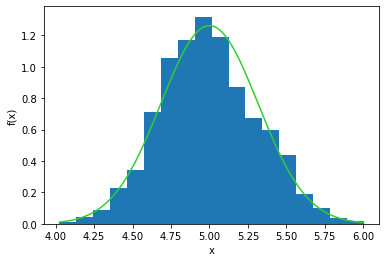

In [37]:
x = np.linspace(means.min(), means.max(), num = 10000) 
f_x = st.norm.pdf(x, loc = df,                        
               scale = math.sqrt(2 * df / n))          

fig,ax = plt.subplots()
# график теоретической функции распределения (по ЦПТ)
ax.plot(x, f_x,label = "PDF", color = "limegreen")
ax.set_xlabel('x')                                         
ax.set_ylabel('f(x)') 

ax.hist(means,density=True, bins = 18)


# Характеристики зависимых выборок

In [43]:
#загенерим двумерный нормальный случайный вектор
#с зависимыми компонентами
mu_x = 10
mu_y = 14
var_x = 3
var_y = 4
corr=-0.5
cov = corr * math.sqrt( var_x * var_y)
mu  = np.array([ mu_x,mu_y])
Sigma=np.array([[var_x, cov]
               ,[cov,var_y]])

n= 1000
s = st.multivariate_normal.rvs(size=n,mean=mu,cov = Sigma)
x= s[:,0]  #реализация первой компоненты
y= s[:,1]  #реализация второй компоненты


In [45]:
# Рассмотрим выборочные характеристики, описывающие
# зависимость между X и Y
print(np.cov(x, y))          # выборочная ковариационная матрица
print(np.corrcoef(x, y))     # выборочная корреляционная матрица


[[ 3.21034936 -1.82937001]
 [-1.82937001  4.0756918 ]]
[[ 1.         -0.50573701]
 [-0.50573701  1.        ]]


# Задачи

In [46]:
# 1. Визуализируйте для выборки объема 5000 из распределения
#    Стьюдента с 10-ю степенями свободы, при помощи Гистограммы,
#    распределение:
#    1)     Второго начального выборочного момента
#    2)     Выборочной дисперсии
#    3)     Выборочной медианы
#    4)     Третьей порядковой статистики, то есть
#           третьего элемента вариационного ряда
#    5)     Выборочной квантили уровня 0.8
#    6)     Выборочной функции распределения в точке 1.5

In [85]:
n= 10000
N= 1000
df=10

x1= np.array([np.mean(st.t.rvs(df=df,size=n)**2)  for i in range(N) ])
x2 =np.array([np.var(st.t.rvs(df=df,size=n))  for i in range(N) ])
x3 =np.array([np.median(st.t.rvs(df=df,size=n))  for i in range(N) ])
x4 =np.array([np.sort(st.t.rvs(df=df,size=n))[2]  for i in range(N) ])
x5 =np.array([np.quantile(st.t.rvs(df=df,size=n), 0.8)  for i in range(N) ])
x6 =np.array([np.mean(st.t.rvs(df=df,size=n)< 1.5)  for i in range(N) ])



Text(0.5, 1.0, 'Гистограмма выб ф.р. в точке 1.5')

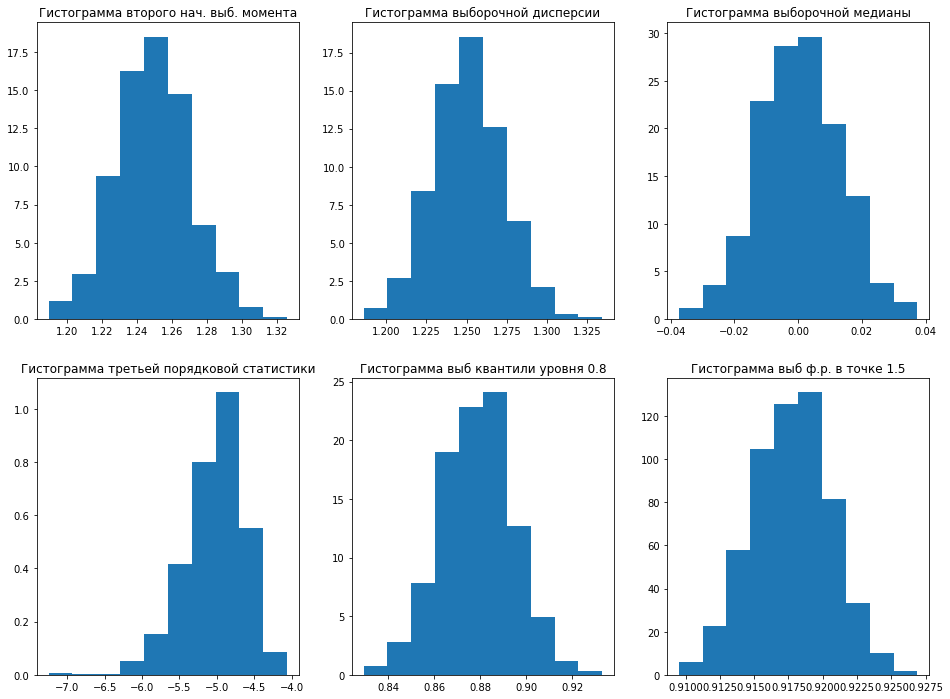

In [88]:
fig,ax = plt.subplots(2,3)

fig.set_size_inches(16,12)

ax[0,0].hist(x1, density= True)
ax[0,0].set_title('Гистограмма второго нач. выб. момента')

ax[0,1].hist(x2, density= True)
ax[0,1].set_title('Гистограмма выборочной дисперсии')

ax[0,2].hist(x3, density= True)
ax[0,2].set_title('Гистограмма выборочной медианы')

ax[1,0].hist(x4, density= True)
ax[1,0].set_title('Гистограмма третьей порядковой статистики')

ax[1,1].hist(x5, density= True)
ax[1,1].set_title('Гистограмма выб квантили уровня 0.8')

ax[1,2].hist(x6, density= True)
ax[1,2].set_title('Гистограмма выб ф.р. в точке 1.5')

Ясно, что второй начальный и центральный моменты асимптотически нормальны,   
поэтому аппроксимируются нормальным распределнием  
Медиана тоже распределена нормально согласно следующей теореме:
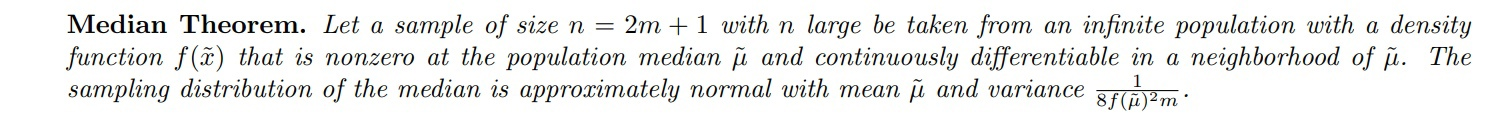

В общем случае для квантилей уровня p имеем следующий асимптотический результат   
https://www.math.mcgill.ca/~dstephens/OldCourses/556-2006/Math556-Median.pdf
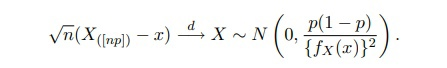

Text(0.5, 1.0, 'Гистограмма и теор. распр. выб ф.р. в точке 1.5')

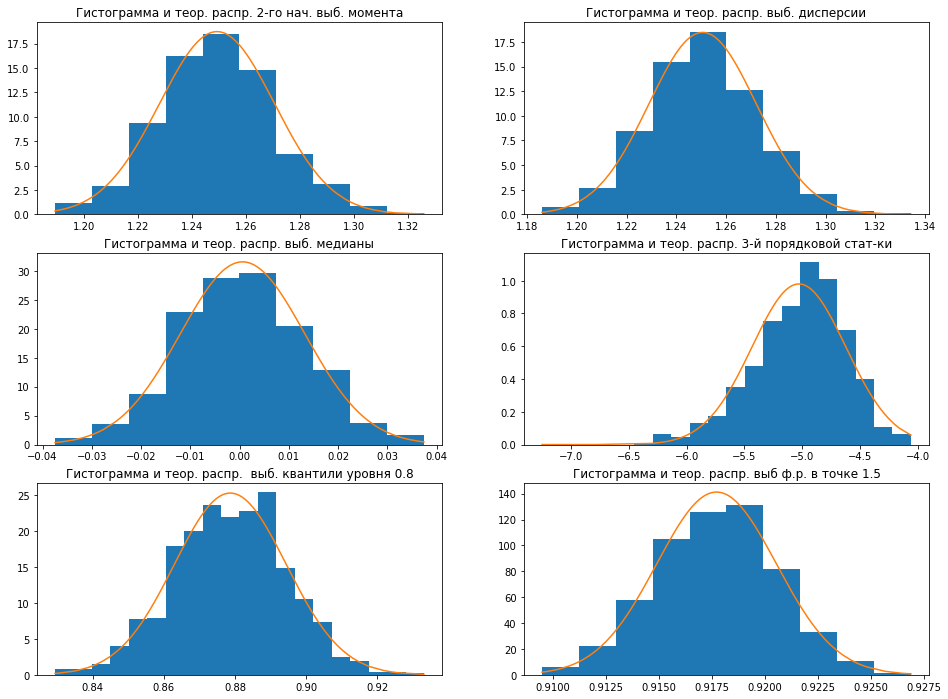

In [90]:
fig,ax = plt.subplots(3,2)

fig.set_size_inches(16,12)

x1 = np.sort(x1)
ax[0,0].hist(x1, density= True)
ax[0,0].plot(x1, st.norm.pdf(x1 ,loc = np.mean(x1), scale = np.sqrt(np.var(x1)) ))
ax[0,0].set_title('Гистограмма и теор. распр. 2-го нач. выб. момента')

x2 = np.sort(x2)
ax[0,1].hist(x2, density= True)
ax[0,1].plot(x2, st.norm.pdf(x2 ,loc = np.mean(x2), scale = np.sqrt(np.var(x2)) ))
ax[0,1].set_title('Гистограмма и теор. распр. выб. дисперсии')

x3 = np.sort(x3)
ax[1,0].hist(x3, density= True)
ax[1,0].plot(x3, st.norm.pdf(x3 ,loc = np.mean(x3), scale = np.sqrt(np.var(x3)) ))
ax[1,0].set_title('Гистограмма и теор. распр. выб. медианы')

x4= np.sort(x4)
ax[1,1].hist(x4,bins = 20, density= True)
ax[1,1].plot(x4, st.norm.pdf(x4 ,loc = np.mean(x4), scale = np.sqrt(np.var(x4)) ))
ax[1,1].set_title('Гистограмма и теор. распр. 3-й порядковой стат-ки')

x5= np.sort(x5)
ax[2,0].hist(x5,bins = 20, density= True)
ax[2,0].plot(x5, st.norm.pdf(x5 ,loc = np.mean(x5), scale = np.sqrt(np.var(x5)) ))
ax[2,0].set_title('Гистограмма и теор. распр.  выб. квантили уровня 0.8')

x6= np.sort(x6)
ax[2,1].hist(x6, density= True)
ax[2,1].plot(x6, st.norm.pdf(x6 ,loc = np.mean(x6), scale = np.sqrt(np.var(x6)) ))
ax[2,1].set_title('Гистограмма и теор. распр. выб ф.р. в точке 1.5')

In [ ]:
# 3. Симулируйте три независимых выборки объемом в 5000 наблюдений
#    из стандартного равномерного распределения. Получите из этих
#    двух выборок две сложив первую со второй, а вторую - с третьей.
#    Для получившихся выборок:
#    1)     Посчитайте выборочную ковариационную матрицу
#    2)     Рассчитайте выборочную корреляционную матрицу
#    3*)    При помощи гистограммы визуализируйте распределение
#           выборочной корреляции

In [94]:
n=5000
x1= st.uniform.rvs(size= n)
x2= st.uniform.rvs(size= n)
x3= st.uniform.rvs(size= n)

y1 = x1+x2
y2 = x2+x3

print(np.cov(y1, y2))          # выборочная ковариационная матрица
print(np.corrcoef(y1, y2))     # выборочная корреляционная матрица


[[0.16324358 0.08271248]
 [0.08271248 0.17101369]]
[[1.         0.49503685]
 [0.49503685 1.        ]]


In [97]:
#    3*)    При помощи гистограммы визуализируйте распределение
#           выборочной корреляции

N=1000
x_corr =[]
for i in range(N):
    x1= st.uniform.rvs(size= n)
    x2= st.uniform.rvs(size= n)
    x3= st.uniform.rvs(size= n)

    y1 = x1+x2
    y2 = x2+x3
    
    x_corr.append(np.corrcoef(y1, y2)[1,0])
    

[]

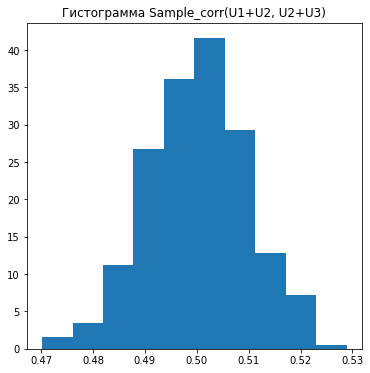

In [102]:
fig,ax =plt.subplots()

fig.set_size_inches(6,6)

ax.hist(x_corr, density = True)
ax.set_title('Гистограмма Sample_corr(U1+U2, U2+U3)')
plt.plot()

In [104]:
# 4. Самостоятельно запрограммируйте функции, позволяющие рассчитывать
#    1)     Выборочное среднее
#    2)     Выборочную дисперсию
#    3*)    Выборочную медиану
#    4)     Порядковые статистики
#    5*)    Выборочную ковариационную матрицу


In [105]:
def my_mean(data):
    return sum(data) /(len(data))

In [119]:
def my_var(data):
    if isinstance(data, list):
        data=np.array(data)
    return sum( (data - my_mean(data)) ** 2) /(len(data))

In [107]:
def my_median(data):
    d = np.sort(data)
    return d[int(len(data) / 2)]

In [108]:
def my_order_statistics(data,k):
    if type(k) == int:
        d = np.sort(data)
        return d[k]

In [121]:
def my_cov(x1,x2):
    x1= x1[:min(len(x1),len(x2))]
    x2= x2[:min(len(x1),len(x2))]
    if isinstance(x1, list):
        x1=np.array(x1)
    if isinstance(x2, list):
        x2=np.array(x2)
    
    return sum((x1 - my_mean(x1))*(x2 - my_mean(x2))  ) / len(x1)

In [125]:
x1=[1,2,3,4,5,6,4,4,5,6,7,5,5,7]
x2=[1,4,6,8,3,1,5,6,8,1,2,4,4,4]
print(my_mean(x1), np.mean(x1))
print(my_var(x1), np.var(x1))
print(my_median(x1), np.median(x1))
print(my_order_statistics(x1,5))
print(my_cov(x1,x2),np.cov(x1,x2)[1,0])


4.571428571428571 4.571428571428571
2.8163265306122454 2.816326530612245
5 5.0
4
-0.6122448979591838 -0.6593406593406594
